## Part B : News Article Classification

### Objective
The primary objective of this project is to build a classification model that can automatically categorize news articles into different predefined categories. The model will be trained using a labeled dataset of news articles and will output the most likely category (e.g.sports,
politics, or technology) for any given article.

The goal is to:

    ● Develop a robust classifier capable of handling articles from multiple categories.
    ● Preprocess the text data, extract meaningful features, and train models to classify the articles.
    ● Evaluate the model performance and provide actionable insights on how well it classifies articles.

## 1. Data Loading and Initial Cleaning
**Objective:** Load the raw dataset and remove invalid entries.

* **Loading:** The code uses `pandas` to read the `data_news.xlsx` file.
* **Inspection:** It checks for null values (`isnull().sum()`) and data types (`info()`).
* **Cleaning:** The command `df_news.dropna()` is crucial here. It removes any rows that are missing headlines or descriptions, ensuring the model only trains on complete data.
* **Target:** The dataset contains roughly 50,000 articles across various categories.

In [ ]:
import pandas as pd

In [17]:
df_news = pd.read_excel('data_news.xlsx')

In [18]:
df_news.columns

Index(['category', 'headline', 'links', 'short_description', 'keywords'], dtype='object')

In [19]:
df_news.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [20]:
df_news.isnull().sum()

category                0
headline                0
links                   0
short_description       6
keywords             2706
dtype: int64

In [21]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  49994 non-null  object
 4   keywords           47294 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [22]:
print(df_news.shape)
df_news = df_news.dropna()
print(df_news.shape)

(50000, 5)
(47288, 5)


In [23]:
df_news.category.unique()

array(['WELLNESS', 'POLITICS', 'ENTERTAINMENT', 'TRAVEL',
       'STYLE & BEAUTY', 'PARENTING', 'FOOD & DRINK', 'WORLD NEWS',
       'BUSINESS', 'SPORTS'], dtype=object)

## 2. Text Preprocessing & Feature Extraction
**Objective:** Convert raw text into a clean format that computers can understand.

In [24]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [25]:
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

### A. Cleaning Function (`preprocess_text_simple`)
Before the machine can read the text, "noise" must be removed:
1.  **Lowercasing:** Converts "Sports" and "SPORTS" to "sports" so they are treated as the same word.
2.  **Regex (`re.sub`):** Removes numbers and special characters, keeping only alphabets.
3.  **Stopwords Removal:** Removes common words like "the", "is", "and" using NLTK's list. Note that *negation words* (like "not", "no") were explicitly kept because they change the meaning of a sentence.
4.  **Lemmatization:** Converts words to their root form (e.g., "running" becomes "run").

In [27]:
def preprocess_text_simple(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

In [26]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

negation_words = {'not', 'no', 'nor', "don't", "aren't", "couldn't", "didn't", "won't"}
stop_words = stop_words - negation_words

### B. Feature Engineering
* **Concatenation:** The code combines the `headline` and `short_description` into a single column called `cleaned_text`. This provides the model with more context than just the headline alone.
* **Label Encoding:** The target categories (text) are converted into numbers (e.g., "SPORTS" -> 7) using `LabelEncoder`, as models require numerical inputs.

In [28]:
target_categories = [
    'WELLNESS', 'POLITICS', 'ENTERTAINMENT', 'TRAVEL', 
    'STYLE & BEAUTY', 'PARENTING', 'FOOD & DRINK', 
    'WORLD NEWS', 'BUSINESS', 'SPORTS'
]

df_filtered = df_news[df_news['category'].isin(target_categories)].copy()

df_filtered['text'] = df_filtered['headline'].astype(str) + " " + df_filtered['short_description'].astype(str)

df_filtered['cleaned_text'] = df_filtered['text'].apply(preprocess_text_simple)

le = LabelEncoder()
y = le.fit_transform(df_filtered['category'])

## 3. Exploratory Data Analysis (EDA)
**Objective:** Visualize the dataset to understand balance and structure.

Step 1.5: Performing EDA...


/tmp/ipykernel_15399/1250153688.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df_filtered, order=order, palette='viridis')


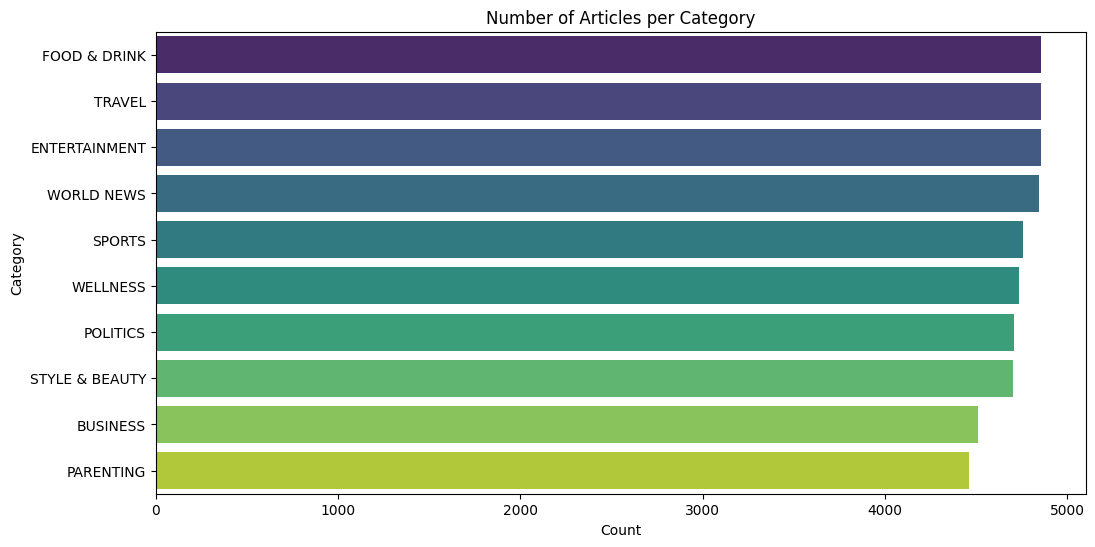

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Step 1.5: Performing EDA...")
plt.figure(figsize=(12, 6))
order = df_filtered['category'].value_counts().index
sns.countplot(y='category', data=df_filtered, order=order, palette='viridis')
plt.title('Number of Articles per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

* **Category Balance:** A count plot is generated to see how many articles exist per category.
    * *Result:* As seen in the provided bar chart, the data is relatively well-balanced, with categories ranging between roughly 4,500 to 4,900 articles.

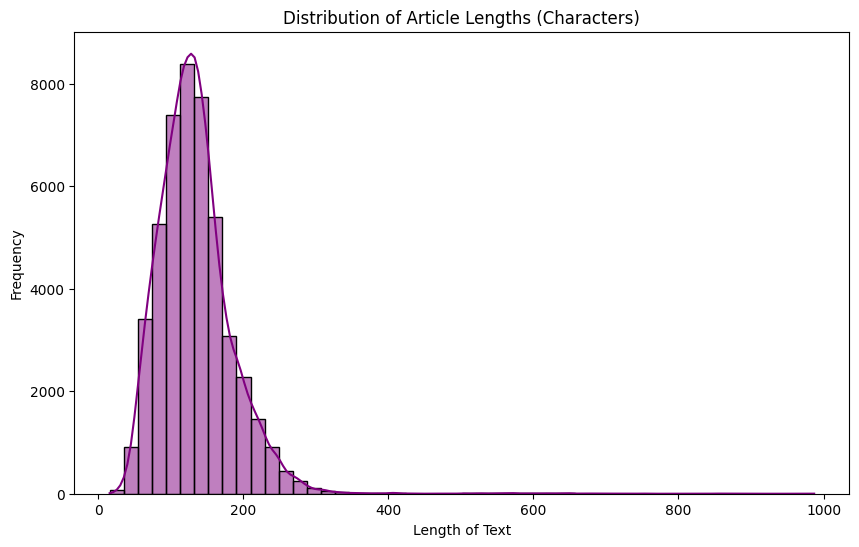

In [30]:
df_filtered['article_length'] = df_filtered['cleaned_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['article_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Article Lengths (Characters)')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

* **Article Length:** A histogram calculates the character length of articles.
    * *Result:* The distribution is right-skewed, meaning most articles are short (headlines + short descriptions), with a few longer outliers.

In [31]:
print("\n--- Article Length Statistics ---")
print(df_filtered['article_length'].describe())


--- Article Length Statistics ---
count    47288.000000
mean       133.828667
std         51.665438
min         16.000000
25%        100.000000
50%        129.000000
75%        159.000000
max        987.000000
Name: article_length, dtype: float64


## 4. Model Development and Comparison
**Objective:** Test multiple algorithms to find the best performer.

The text is converted into a numerical matrix using **TF-IDF (Term Frequency-Inverse Document Frequency)**.
* `ngram_range=(1,2)`: This tells the vectorizer to look at single words ("bad") and two-word phrases ("not bad").

In [32]:
import pandas as pd
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [33]:
print("Step 2: Converting Text to Numbers (TF-IDF)...")

tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),  
    stop_words="english",
    min_df=5,
    max_df=0.9,
    sublinear_tf=True,
    norm="l2")

X = tfidf.fit_transform(df_filtered['cleaned_text'])

le = LabelEncoder()
y = le.fit_transform(df_filtered['category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Data Prepared: {X_train.shape} training samples.")

Step 2: Converting Text to Numbers (TF-IDF)...
Data Prepared: (35466, 10000) training samples.


Four models were trained and compared:
1.  **Logistic Regression:** A strong baseline for text classification.
2.  **Random Forest:** An ensemble of decision trees (tends to struggle with high-dimensional sparse text data compared to linear models).
3.  **XGBoost:** A gradient boosting algorithm.
4.  **Linear SVM (Support Vector Machine):** A model that finds the best hyperplane to separate classes.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC

# Step 3: Model Development (Comparison)

print("Step 3: Training Multiple Models for Comparison...")

#  Model A: Logistic Regression
print("\n1. Training Logistic Regression...")

log_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
print(f"   Logistic Regression Accuracy: {log_acc:.4f}")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))


#  Model B: Random Forest 
print("\n2. Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


# Model C: XGBoost
print("\n3. Training XGBoost (Default)...")
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"   XGBoost Accuracy: {xgb_acc:.4f}")    
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# Model D: LinearSVC

svm_model = LinearSVC(random_state=42, dual='auto')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"   Linear SVM Accuracy: {svm_acc:.4f}")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

# --- Final Comparison ---
print("\n--- Model Comparison Summary ---")
print(f"Logistic Regression: {log_acc:.4f}")
print(f"Random Forest:       {rf_acc:.4f}")
print(f"XGBoost:             {xgb_acc:.4f}")
print(f"Linear SVM:          {svm_acc:.4f}")

Step 3: Training Multiple Models for Comparison...

1. Training Logistic Regression...
   Logistic Regression Accuracy: 0.8124
                precision    recall  f1-score   support

      BUSINESS       0.76      0.77      0.76      1127
 ENTERTAINMENT       0.81      0.80      0.80      1214
  FOOD & DRINK       0.87      0.87      0.87      1214
     PARENTING       0.80      0.78      0.79      1115
      POLITICS       0.78      0.73      0.75      1177
        SPORTS       0.88      0.92      0.90      1190
STYLE & BEAUTY       0.89      0.85      0.87      1176
        TRAVEL       0.81      0.82      0.81      1214
      WELLNESS       0.73      0.78      0.75      1184
    WORLD NEWS       0.81      0.81      0.81      1211

      accuracy                           0.81     11822
     macro avg       0.81      0.81      0.81     11822
  weighted avg       0.81      0.81      0.81     11822


2. Training Random Forest...
Random Forest Accuracy: 0.7519
                precision

**Comparison Results:**
* Logistic Regression: ~81.24%
* Random Forest: ~75.19%
* XGBoost: ~76.70%
* **Linear SVM: ~81.25% (Winner)**

### Implementing Linear SVM 

## 5. Hyperparameter Tuning
**Objective:** Optimize the best performing model (Linear SVM).

Since Linear SVM won, the code performs a **Grid Search** (`GridSearchCV`) to tune it further.
* **Parameters Tested:** It tried different values for `C` (regularization strength) and `class_weight`.
* **Best Parameters:** The search found that `{'C': 0.1, 'class_weight': None}` provided the best results.

In [35]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')

In [36]:
from sklearn.model_selection import GridSearchCV

# Suppress warnings

warnings.filterwarnings('ignore')

print("Step 3: Optimization & Final Training for SVM (using Grid Search)...")

print("\n1. Running Grid Search (Checking all combinations)...")


param_grid = {
    'C': [0.1, 1, 10],                 
    'class_weight': [None, 'balanced'] 
}

# Initialize base model
svm_base = LinearSVC(random_state=42, dual='auto')


grid_search = GridSearchCV(
    estimator=svm_base, 
    param_grid=param_grid, 
    scoring='accuracy',   
    cv=5,                 
    verbose=1,            
    n_jobs=-1              
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"\n   Best Parameters Found: {best_params}")

Step 3: Optimization & Final Training for SVM (using Grid Search)...

1. Running Grid Search (Checking all combinations)...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

   Best Parameters Found: {'C': 0.1, 'class_weight': None}


In [37]:
print("\n2. Training Final SVM Model using Best Parameters...")

# Initialize Final Model

final_model = LinearSVC(
    C=best_params['C'],
    class_weight=best_params['class_weight'],
    random_state=42,
    dual='auto'
)


final_model.fit(X_train, y_train)


2. Training Final SVM Model using Best Parameters...


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,0.1
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


## 6. Final Evaluation
**Objective:** Test the optimized model on unseen data.

The final Linear SVM model was trained with the optimized parameters and evaluated on the test set.

In [38]:
print("\n3. Evaluating on Test Data...")

# Predict
y_pred = final_model.predict(X_test)

# Results
print(f"\n--- Final SVM Accuracy: {accuracy_score(y_test, y_pred):.4f} ---")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


3. Evaluating on Test Data...

--- Final SVM Accuracy: 0.8135 ---

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.76      0.77      0.77      1127
 ENTERTAINMENT       0.83      0.78      0.81      1214
  FOOD & DRINK       0.86      0.89      0.87      1214
     PARENTING       0.78      0.79      0.78      1115
      POLITICS       0.79      0.72      0.76      1177
        SPORTS       0.87      0.93      0.90      1190
STYLE & BEAUTY       0.88      0.86      0.87      1176
        TRAVEL       0.81      0.81      0.81      1214
      WELLNESS       0.74      0.77      0.75      1184
    WORLD NEWS       0.81      0.82      0.81      1211

      accuracy                           0.81     11822
     macro avg       0.81      0.81      0.81     11822
  weighted avg       0.81      0.81      0.81     11822



* **Final Accuracy:** **81.35%**

* **Confusion Matrix:** A heatmap was plotted to visualize where the model makes mistakes.

Step 4: Generating Visualizations...
1. Plotting Confusion Matrix...


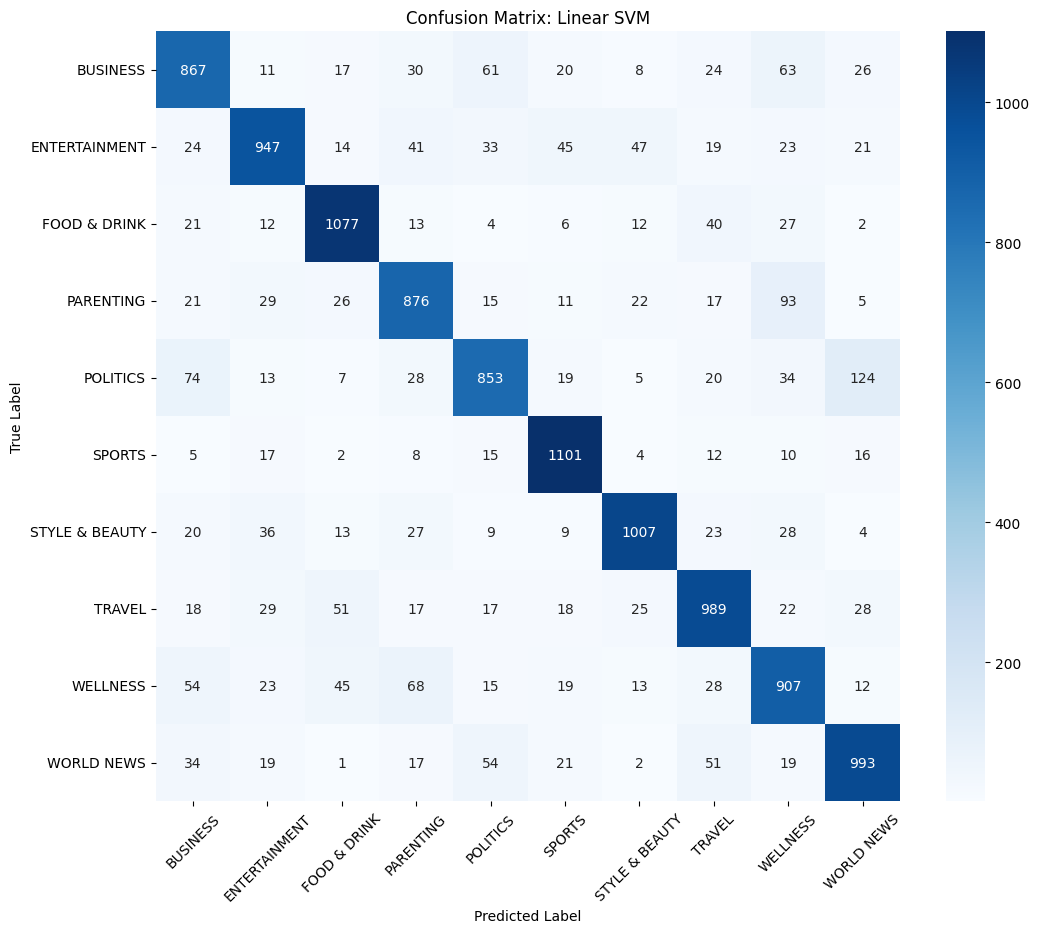

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

print("Step 4: Generating Visualizations...")

# --- A. Confusion Matrix ---
print("1. Plotting Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Linear SVM')
plt.xticks(rotation=45)
plt.show()

* *Interpretation:* The diagonal line (dark blue boxes) shows correct predictions.
* *Common Errors:* The matrix shows some confusion between semantically similar categories, such as **PARENTING** vs. **WELLNESS**, or **WORLD NEWS** vs. **POLITICS**, which is expected in text classification.

#### Video Link:- https://drive.google.com/file/d/18dlcW6lzNP--FDVv5MSO3jfPzhVrniPG/view?usp=sharing